In [75]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

In [76]:
import os 
os.path.join(os.getcwd(), '..')
tmp = os.path.abspath(os.path.join(os.getcwd(), '..'))
path = os.path.join(tmp, 'Data', 'half_processed_data.csv')
df = pd.read_csv(path) 
df

,Name,parole
0,THREEPIO,Did you hear that? They've shut down the main ...
1,THREEPIO,We're doomed!
2,THREEPIO,There'll be no escape for the Princess this time.
3,THREEPIO,What's that?
4,THREEPIO,I should have known better than to trust the l...
...,...,...
997,LUKE,"Oh, no!"
998,THREEPIO,"Oh, my! Artoo! Can you hear me? Say something!..."
999,TECHNICIAN,We'll get to work on him right away.
1000,THREEPIO,"You must repair him! Sir, if any of my circuit..."


In [105]:
stop_words = set(stopwords.words("english"))
# stop_words

In [175]:
# ## exemple
# words = word_tokenize(df['parole'][998])
# words
# # words
# filtered_sentence = [w for w in words if not w in stop_words]
# # filtered_sentence

In [103]:
# string = df['parole'][0].replace("'", " ") 
# string = string.lower()
# string

# words = word_tokenize(string)
# words
# filtered_sentence = [w for w in words if not w in stop_words]
# filtered_sentence

In [174]:
# ## this is it
# hope = df['parole'][0]
# hope = hope.lower()
# tokenizer = RegexpTokenizer(r'\w+')
# words = tokenizer.tokenize(hope)
# filtered_sentence = [w for w in words if not w in stop_words]
# filtered_sentence

In [123]:
# lemmatizer = WordNetLemmatizer()
# lemmatizer.lemmatize("better", pos ="a")

'good'

In [77]:
## fonction pour enlever les répititions 
def unique(lst):
    res = []
    for x in lst:
        if x not in res:
            res.append(x)
    return res

In [87]:
## Let's creat a function
## cette fonction va prendre une chaine de caractères
## et va sortir une liste des vocabulaire important dans cette chaie de caractères
def filtre(str):
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    ## on va mettre tout en miniscule
    str = str.lower()
    ## on va créer un 'pattern' 
    ## \w désigne un alphanumerique
    ## c à d qu'on cheche tout morceaux composé d'alphanumériques
    tokenizer = RegexpTokenizer(r'\w+')
    ## on va sépparer la chaine de caractère 
    words = tokenizer.tokenize(str)
    ## on va enlever les "stopwords"
    filtered_sentence = [w for w in words if not w in stop_words]
    ## par une boucle on va trouver les mots apparteneant au même champ lexicale
    for i in range (len(filtered_sentence)):
        filtered_sentence[i] = lemmatizer.lemmatize(filtered_sentence[i])
    ## on va enlever les répitition 
    filtered_sentence = unique(filtered_sentence)
    return filtered_sentence

In [88]:
print(df['parole'][0])
print(filtre(df['parole'][0]))

Did you hear that? They've shut down the main reactor. We'll be destroyed for sure. This is madness!
['hear', 'shut', 'main', 'reactor', 'destroyed', 'sure', 'madness']


In [89]:
## fonction qui transforme notre pandas 
## elle va rajouter une autre colonne de paroles traités
def magic2(df):
    temp = []
    for i in range(len(df)):
        temp.append(filtre(df['parole'][i]))
    df['paroles_traités']= temp
    return df
magic2(df)


,Name,parole,paroles_traités
0,THREEPIO,Did you hear that? They've shut down the main ...,"[hear, shut, main, reactor, destroyed, sure, m..."
1,THREEPIO,We're doomed!,[doomed]
2,THREEPIO,There'll be no escape for the Princess this time.,"[escape, princess, time]"
3,THREEPIO,What's that?,[]
4,THREEPIO,I should have known better than to trust the l...,"[known, better, trust, logic, half, sized, the..."
...,...,...,...
997,LUKE,"Oh, no!",[oh]
998,THREEPIO,"Oh, my! Artoo! Can you hear me? Say something!...","[oh, artoo, hear, say, something, mechanic, re..."
999,TECHNICIAN,We'll get to work on him right away.,"[get, work, right, away]"
1000,THREEPIO,"You must repair him! Sir, if any of my circuit...","[must, repair, sir, circuit, gear, help, gladl..."


# indicateurs statistiques

In [20]:
## is1 : nombre de paroles pour chaque personnage
## deux lignes de code "THUG LIFE"
from collections import Counter
is1 = pd.DataFrame.from_dict(Counter(df['Name']), orient='index').reset_index()
is1 = is1.rename(columns={'index':'Name', 0:'number_of_speches'})
is1

,Name,number_of_speches
0,THREEPIO,119
1,LUKE,252
2,IMPERIAL OFFICER,2
3,VADER,42
4,REBEL OFFICER,1
...,...,...
62,RED NINE'S VOICE,1
63,DEATH STAR INTERCOM VOICE,4
64,BASE VOICE,1
65,WINGMAN,1


Text(104.875, 0.5, 'number of speches')

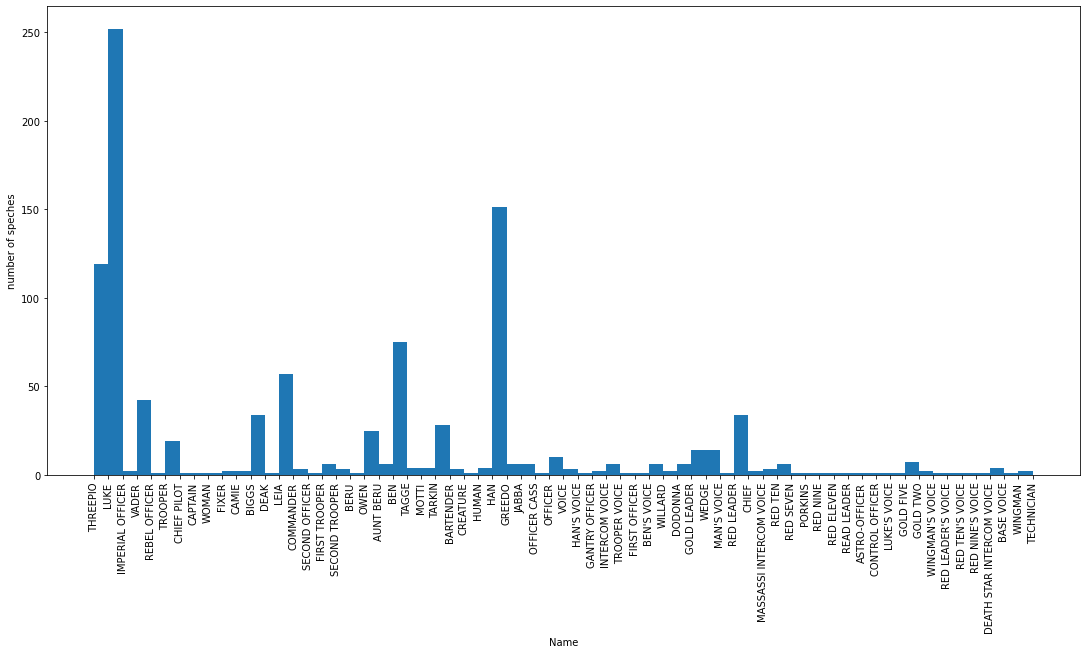

In [112]:
from matplotlib.pyplot import hist
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)
hist(is1.Name, weights=is1.number_of_speches,density=False, bins = 66)
y_pos = range(len(is1.Name))
plt.xticks(y_pos, is1.Name, rotation=90)
plt.tight_layout()
ax.set_xlabel('Name')
ax.set_ylabel('number of speches')